In [49]:
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
import random
import time
import os
import sys
import os.path
import string

# ---- for TF-IDF & NLTK
import math
from textblob import TextBlob as tb
import nltk
from nltk.corpus import wordnet as wn
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
from pathlib import Path
from beautifultable import BeautifulTable
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

import re, string, unicodedata
import contractions
import inflect
from bs4 import BeautifulSoup
from tabulate import tabulate

allRunsAccuracy = []

import matplotlib.pyplot as plt
import csv
from textblob import TextBlob
import pandas
import sklearn
#import cPickle
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.learning_curve import learning_curve

In [50]:
sentences = pandas.read_csv('C:/Users/ani/Desktop/Course data Thesis/INTENT MINING/allMergedNoNL.csv', sep='|', quoting=csv.QUOTE_NONE,
                           names=["Label", "Sentence"], encoding = "ISO-8859-1")
print(sentences[:5]) 

  Label                                           Sentence
0    CD  provided some conditions are satisfied,the ext...
1    CD  but how am i supposed to find those maximum an...
2    CD  we've actually alreaOMITTED done this in some ...
3    CD                       here's a frour-step process 
4    AP  first,differentiate your function can find all...


In [51]:
sentences.groupby('Label').describe()

Sentence                                                               
         count unique                                                top freq
Label                                                                        
AP         317    317  and again,here i'm going to,here i'm asking yo...    1
CD        6652   6639                                            rumble     2
CM         277    277          and this function is called the residual     1
EX         562    561                         so let me show you a demo     2
SM         570    570  in the next video,we will have an overview of ...    1

  Label                                           Sentence  length
0    CD  provided some conditions are satisfied,the ext...     119
1    CD  but how am i supposed to find those maximum an...      63
2    CD  we've actually alreaOMITTED done this in some ...     131
3    CD                       here's a frour-step process       28
4    AP  first,differentiate your function can find all...      67
["and the fourth one is if you do get around the obstacle there will be a point where you're going to start making progress again toward the goal location and you will probably no lee,no longer need to slide along the wall in order to make progress,so if those both tho,both of those conditions are,end up being true,then you can go ahead and switch back to your goal-seeking behavior,so which is either go to goal,or what i usually like do to is if,if i'm close to an obstacle,which i typically am because of the follow all behavior i first switch into avoid obstacles and go to goal before i swit

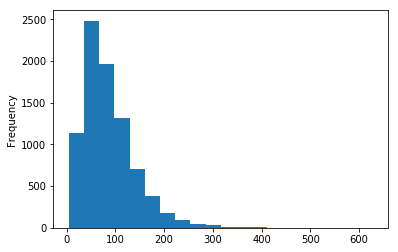

In [52]:
sentences['length'] = sentences['Sentence'].map(lambda text: len(text))
print(sentences.head())

sentences.length.plot(bins=20, kind='hist')

sentences.length.describe()

print(list(sentences.Sentence[sentences.length > 600]))